In [ ]:
from google.colab import drive

drive.mount("/content/drive")  
!pwd  # show current path 

Mounted at /content/drive
/content


In [ ]:
%cd "/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases"
!ls  # show current directory

/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases
us2022q2a.csv  usfirms2022.csv


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
sns.set(rc={"figure.figsize": (14,8)})

In [ ]:
df_data = pd.read_csv("us2022q2a.csv")
df_firms = pd.read_csv("usfirms2022.csv")

In [ ]:
df_data

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


In [ ]:
df = df_data.query("q >= '2022q1' and q <='2022q1'")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
88,A,2022q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,5.173000e+06,0.000,2.730000e+06,5154000.00,131.888962,132.3300,300113.377,3.0,2022.0,1.0
178,AA,2022q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,9.731000e+06,1000.000,1.727000e+06,6257000.00,89.694160,90.0300,185403.032,3.0,2022.0,1.0
268,AAIC,2022q1,8470.0,4773.0,0.000000e+00,0.0,-4111.00000,0.000,2287.0,9.208830e+05,7.027860e+05,NaN,1.639200e+05,218097.00,3.470000,3.4700,35016.392,3.0,2022.0,1.0
358,AAL,2022q1,8899000.0,0.0,1.062200e+07,0.0,92000.00000,455000.000,-451000.0,6.740100e+07,7.634100e+07,2382000.000,3.546100e+07,-8940000.00,18.250000,18.2500,649160.117,3.0,2022.0,1.0
448,AAME,2022q1,51608.0,0.0,4.781200e+04,0.0,0.00000,0.000,954.0,3.750310e+05,2.486080e+05,NaN,3.373800e+04,126423.00,3.112825,3.1300,20378.576,3.0,2022.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324084,ZVIA,2022q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,2.261900e+04,608.000,4.840000e+02,93861.00,4.570000,4.5700,66686.135,3.0,2022.0,1.0
324174,ZVO,2022q1,61633.0,39829.0,2.903600e+04,0.0,-127.00000,0.000,78.0,1.487510e+05,1.374840e+05,0.000,0.000000e+00,11267.00,0.820100,0.8201,34054.879,3.0,2022.0,1.0
324264,ZWS,2022q1,239600.0,137700.0,5.690000e+04,1100.0,1100.00000,4800.000,10000.0,1.118600e+06,9.249000e+05,5600.000,5.403000e+05,193700.00,35.281528,35.4000,125782.456,3.0,2022.0,1.0
324354,ZY,2022q1,4791.0,12455.0,5.608200e+04,-130.0,-532.00000,7994.000,-26.0,6.181890e+05,2.741250e+05,57845.000,1.811680e+05,344064.00,2.890000,2.8900,103120.808,3.0,2022.0,1.0


In [ ]:
df_firms.rename(columns = {'Ticker':'firm','Sector NAICS\nlevel 1':'Industry'},inplace=True)

In [ ]:
df = df.merge(df_firms, on='firm')

In [ ]:
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,N,Class,Country\nof Origin,Type of Asset,Industry,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2022q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,AA,2022q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,...,Alcoa Corp,127,Com,US,Stock,Manufacturing,NYSE,Basic & Fab Metal,Alumina and Aluminum Production and Processing,-
2,AAIC,2022q1,8470.0,4773.0,0.000000e+00,0.0,-4111.00000,0.000,2287.0,9.208830e+05,...,Arlington Asset Investment Corp,303,Com A,US,Stock,Finance and Insurance,NYSE,Funds,Other Investment Pools and Funds,-
3,AAL,2022q1,8899000.0,0.0,1.062200e+07,0.0,92000.00000,455000.000,-451000.0,6.740100e+07,...,American Airlines Group Inc,186,Com,US,Stock,Transportation and Warehousing,NASDAQ,Transportat Serv,Scheduled Air Transportation,0.032
4,AAME,2022q1,51608.0,0.0,4.781200e+04,0.0,0.00000,0.000,954.0,3.750310e+05,...,Atlantic American Corp,353,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Insurance Carriers,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,ZVIA,2022q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,...,Zevia Pbc,3591,Com A,US,Stock,Manufacturing,NYSE,Food & Beverage,Beverage Manufacturing,-
3596,ZVO,2022q1,61633.0,39829.0,2.903600e+04,0.0,-127.00000,0.000,78.0,1.487510e+05,...,Zovio Inc,3601,Com,US,Stock,Educational Services,NASDAQ,Other,Educational Services,-
3597,ZWS,2022q1,239600.0,137700.0,5.690000e+04,1100.0,1100.00000,4800.000,10000.0,1.118600e+06,...,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3598,ZY,2022q1,4791.0,12455.0,5.608200e+04,-130.0,-532.00000,7994.000,-26.0,6.181890e+05,...,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-


In [ ]:
df['q'] = pd.PeriodIndex(df['q'], freq="Q")
df.set_index(['firm','q'],inplace=True)
df.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind"], inplace=True)
df

,,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Industry,Sector\nEconomatica
firm,q,,,,,,,,,,,,,,,,,,,,
A,2022Q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,5.173000e+06,0.000,2.730000e+06,5154000.00,131.888962,132.3300,300113.377,3.0,2022.0,1.0,Manufacturing,Electric Electron
AA,2022Q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,9.731000e+06,1000.000,1.727000e+06,6257000.00,89.694160,90.0300,185403.032,3.0,2022.0,1.0,Manufacturing,Basic & Fab Metal
AAIC,2022Q1,8470.0,4773.0,0.000000e+00,0.0,-4111.00000,0.000,2287.0,9.208830e+05,7.027860e+05,NaN,1.639200e+05,218097.00,3.470000,3.4700,35016.392,3.0,2022.0,1.0,Finance and Insurance,Funds
AAL,2022Q1,8899000.0,0.0,1.062200e+07,0.0,92000.00000,455000.000,-451000.0,6.740100e+07,7.634100e+07,2382000.000,3.546100e+07,-8940000.00,18.250000,18.2500,649160.117,3.0,2022.0,1.0,Transportation and Warehousing,Transportat Serv
AAME,2022Q1,51608.0,0.0,4.781200e+04,0.0,0.00000,0.000,954.0,3.750310e+05,2.486080e+05,NaN,3.373800e+04,126423.00,3.112825,3.1300,20378.576,3.0,2022.0,1.0,Finance and Insurance,Finance and Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2022Q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,2.261900e+04,608.000,4.840000e+02,93861.00,4.570000,4.5700,66686.135,3.0,2022.0,1.0,Manufacturing,Food & Beverage
ZVO,2022Q1,61633.0,39829.0,2.903600e+04,0.0,-127.00000,0.000,78.0,1.487510e+05,1.374840e+05,0.000,0.000000e+00,11267.00,0.820100,0.8201,34054.879,3.0,2022.0,1.0,Educational Services,Other
ZWS,2022Q1,239600.0,137700.0,5.690000e+04,1100.0,1100.00000,4800.000,10000.0,1.118600e+06,9.249000e+05,5600.000,5.403000e+05,193700.00,35.281528,35.4000,125782.456,3.0,2022.0,1.0,Manufacturing,Industrial Machin


In [ ]:
df = df.assign(bookvalue = (df['totalassets']-df['totalliabilities']))
#df.sort_values(by=['bookvalue'], ascending = False )

In [ ]:
df = df.assign(marketvalue = (df['originalprice']*df['sharesoutstanding']))
#df.sort_values(by=['marketvalue'], ascending = False )

In [ ]:
df = df.assign(ebit = (df['revenue']-df['cogs']-df['sgae']-df['otheropexp']))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.assign(netincome = (df['ebit']-df['incometax']-df['finexp']))
df = df.assign(ROA = (df['netincome']/df['totalassets']))
df[['ROA','netincome','totalassets']].sort_values(by='ROA', ascending = False).head(10)

,,ROA,netincome,totalassets
firm,q,,,
BPT,2022Q1,2.071964,1.243800e+04,6003.000
PBT,2022Q1,1.596546,3.734694e+03,2339.234
WINA,2022Q1,0.645181,9.852501e+03,15270.900
SBGI,2022Q1,0.399880,2.664000e+06,6662000.000
CRT,2022Q1,0.371304,1.684932e+03,4537.883
VIR,2022Q1,0.211605,6.109300e+05,2887129.000
LPX,2022Q1,0.184644,4.930000e+05,2670000.000
HRB,2022Q1,0.178448,6.747350e+05,3781127.000
QDEL,2022Q1,0.155162,4.799360e+05,3093125.000


In [ ]:
df = df.assign(profitmargin = (df['ebit']/df['revenue']))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df.sort_values(by=['profitmargin'], ascending = False )

In [ ]:
df = df.assign(bookvalue = (df[['bookvalue']]))
df = df.assign(marketvalue = (df[['marketvalue']]))
df = df.assign(booktomarket = (df['bookvalue']/df['marketvalue']))
#df.sort_values(by=['booktomarket'], ascending = False )

In [ ]:
df['Adj'] = np.log(df['adjprice']) - np.log(df['adjprice'].shift(4))

In [ ]:
df.describe()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,year,cto,bookvalue,marketvalue,ebit,netincome,ROA,profitmargin,booktomarket,Adj
count,3.505000e+03,3.504000e+03,3.504000e+03,3.504000e+03,3.505000e+03,3.505000e+03,3.505000e+03,3.510000e+03,3.510000e+03,2.934000e+03,...,3600.0,3600.0,3.510000e+03,3.550000e+03,3.504000e+03,3.504000e+03,3504.000000,3234.000000,3499.000000,3574.000000
mean,1.343948e+06,7.736588e+05,3.637429e+05,1.794653e+04,-1.605533e+04,1.645795e+04,3.160967e+04,1.558759e+07,1.234050e+07,3.347133e+05,...,2022.0,1.0,3.247084e+06,1.329745e+07,1.878907e+05,1.399096e+05,-0.022645,-9.842945,0.541085,-0.002978
std,5.979345e+06,4.373365e+06,1.601791e+06,2.277292e+05,3.272018e+05,6.957570e+04,1.833781e+05,1.147118e+08,1.043877e+08,2.117994e+06,...,0.0,0.0,1.369733e+07,8.443410e+07,1.019701e+06,8.516896e+05,0.102863,156.626350,0.594958,2.102129
min,-9.130980e+05,-1.100000e+04,-2.374000e+06,-3.322000e+06,-8.571000e+06,-1.053553e+06,-1.793000e+06,1.956000e+03,5.000000e+00,-1.500600e+04,...,2022.0,1.0,-1.526800e+07,7.241894e+03,-6.669379e+06,-6.675247e+06,-1.462679,-6855.142857,-4.800709,-7.873274
25%,1.860937e+04,0.000000e+00,1.021025e+04,0.000000e+00,-2.183000e+03,0.000000e+00,0.000000e+00,2.851752e+05,9.790400e+04,5.095510e+02,...,2022.0,1.0,1.023302e+05,2.498051e+05,-7.376467e+03,-9.423441e+03,-0.031939,-0.093157,0.200823,-1.389649
50%,1.408040e+05,2.077600e+04,5.210100e+04,0.000000e+00,0.000000e+00,5.000000e+02,8.380000e+02,1.486858e+06,8.650485e+05,7.512000e+03,...,2022.0,1.0,4.379725e+05,1.381846e+06,9.835580e+03,5.071500e+03,0.004278,0.072301,0.431694,-0.002512
75%,6.533480e+05,2.574395e+05,1.852395e+05,2.256425e+01,3.640000e+02,9.114000e+03,1.271900e+04,6.219684e+06,4.247427e+06,6.599300e+04,...,2022.0,1.0,1.717624e+06,5.475185e+06,8.673275e+04,6.001375e+04,0.013947,0.227732,0.763873,1.409007
max,1.528710e+08,1.155220e+08,4.602700e+07,7.727000e+06,5.320000e+06,1.722000e+06,5.129000e+06,3.954687e+09,3.668788e+09,5.938790e+07,...,2022.0,1.0,2.858990e+08,2.849538e+09,2.997900e+07,2.485000e+07,2.071964,29.146628,7.900232,7.751128


In [ ]:
df = df.dropna()

In [ ]:
X = df[['Adj','ROA','profitmargin','booktomarket']]

Correlation Matrix

In [ ]:
N = len(X)
uno = np.ones((len(X),1))
x1 = X.T @ X
x2 = X.T @ uno
x3 = (X.T @ uno).T
m = 1/N

corr_matrix = (x1 - m * (x2 @ x3)) / (N-1)
corr_matrix

,Adj,ROA,profitmargin,booktomarket
Adj,4.444422,0.054431,24.390102,-0.239692
ROA,0.054431,0.009296,2.345885,0.000823
profitmargin,24.390102,2.345885,30034.899518,1.758350
booktomarket,-0.239692,0.000823,1.758350,0.335198


In [ ]:
X.corr()

,Adj,ROA,profitmargin,booktomarket
Adj,1.000000,0.267788,0.066756,-0.196379
ROA,0.267788,1.000000,0.140392,0.014746
profitmargin,0.066756,0.140392,1.000000,0.017524
booktomarket,-0.196379,0.014746,0.017524,1.000000


Covariance Matrix

In [ ]:
#np.cov(df_new, bias = True)
X.cov()

,Adj,ROA,profitmargin,booktomarket
Adj,4.444422,0.054431,24.390102,-0.239692
ROA,0.054431,0.009296,2.345885,0.000823
profitmargin,24.390102,2.345885,30034.899518,1.758350
booktomarket,-0.239692,0.000823,1.758350,0.335198


Multicollinearity

In [ ]:
vif_data = pd.DataFrame()
df_vif  = X[['ROA','profitmargin','booktomarket']]
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)

        feature       VIF
0           ROA  1.029028
1  profitmargin  1.023027
2  booktomarket  1.007083


In [ ]:
x = X[['ROA','profitmargin','booktomarket']].to_numpy()
y = X['Adj'].values
x= np.transpose(x)


In [ ]:
X.head()

,,Adj,ROA,profitmargin,booktomarket
firm,q,,,,
AAOI,2022Q1,-3.201678,-0.034945,-0.272558,2.386108
AAON,2022Q1,2.772863,0.025142,0.125895,0.164018
AAPL,2022Q1,4.024168,0.070866,0.308179,0.023653
AAWW,2022Q1,0.441623,0.012774,0.117047,1.094307
ABBV,2022Q1,-0.253280,0.026129,0.348427,0.056896


Matricial Algorithm

In [ ]:
import numpy as np

def determinar_b(X, Y):
    X = np.insert(X, 0, np.array((np.ones(len(X[0])))), 0).T
    return np.linalg.inv(X.T @ X) @ X.T @ Y
    
b = determinar_b(x, y)

for i in range (len(b)):
    print("b" + str(i) + ": "+str(b[i]))

print(b)

b0: 0.5297882515553051
b1: 5.81901690502958
b2: 0.00040038533220445715
b3: -0.731466844844977
[ 5.29788252e-01  5.81901691e+00  4.00385332e-04 -7.31466845e-01]


In [ ]:
x_new = X[['ROA','profitmargin','booktomarket']].to_numpy()

In [ ]:
intercept = b[0]
b = np.array(b)

forecast=[]
for i in range(len(x_new)):
    pred = b[0]*x_new[i][0] + b[1]*x_new[i][1] + b[2]*x_new[i][2] + intercept
    forecast.append(float(pred))


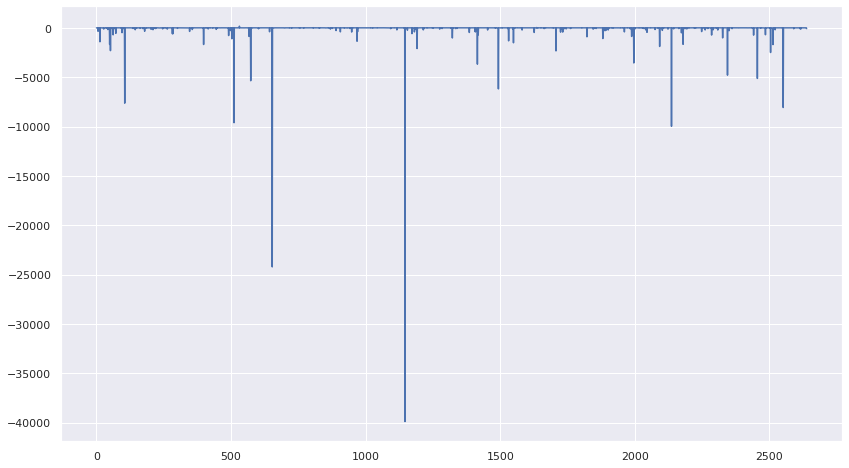

In [ ]:
plt.plot(forecast)

In [ ]:
error = X['Adj'].values - forecast

In [ ]:
print("error promedio: " + str(error.mean()))

error promedio: 70.38332634414648


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = sm.add_constant(X)

results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.838e+31
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:43:03   Log-Likelihood:                 82447.
No. Observations:                2639   AIC:                        -1.649e+05
Df Residuals:                    2634   BIC:                        -1.649e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.146e-15   1.68e-16    -24.731   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(b)

[ 5.29788252e-01  5.81901691e+00  4.00385332e-04 -7.31466845e-01]
